In [3]:
import os

from os.path import join as pjoin

import numpy as np

import pandas as pd

from Load_TCN import *

from TCN import *

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

import time

# import tensorflow as tf
# tf.config.experimental_run_functions_eagerly(True)

In [4]:
import tensorflow as tf


input_dir1 = 'G:\\geoeast\\F3-data\\TCN_intepretation\\prevision_data\\train_100\\image\\'
# 'G:\\geoeast\\F3-data\\TCN_intepretation\\prevision_data\\train_50\\image\\'
# 'G:\\geoeast\\F3-data\\TCN_intepretation\\prevision_data\\train_100\\pre_data\\image\\'
seismic = seismic_data(input_dir1,100)
input_dir2 = 'G:\\geoeast\\F3-data\\TCN_intepretation\\prevision_data\\train_100\\mask\\'
seismic_mask = seismic_data(input_dir2,100)
x_tra, y_tra = train_val_split(seismic,seismic_mask)
x_tra, x_valid, y_tra, y_valid = train_test_split(x_tra,y_tra,test_size=0.15,random_state=2021)
start = time.clock()
# x_tra, x_valid, y_tra, y_valid = train_test_split(seismic,mask,test_size=0.2,random_state=2021)
model = TCN()
callbacks = [EarlyStopping(patience=5, verbose=1),ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('TCN_100.h5', verbose=1, save_best_only=True, save_weights_only=True)]

train=model.fit(x=x_tra,y=y_tra,batch_size=85,epochs=100,validation_data=(x_valid, y_valid),shuffle=True,callbacks=callbacks)

# [0:2.50527317,1:2.30678518,2:0.60938121,3:1.80032496,4:1.20320781,5:0.74346009,6:0.70035863,7:1.19587049,8:0.67221851,9:0.95873796]

end = time.clock()
run_time = end-start
print('运行时间',run_time)

(462, 1700)
(462, 1700)
(1700, 462) (1700, 462, 10)


F:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 462, 1)]     0                                            
__________________________________________________________________________________________________
weight_normalization_24 (Weight (None, 462, 64)      1345        input_3[0][0]                    
__________________________________________________________________________________________________
activation_36 (Activation)      (None, 462, 64)      0           weight_normalization_24[0][0]    
__________________________________________________________________________________________________
dropout_24 (Dropout)            (None, 462, 64)      0           activation_36[0][0]              
____________________________________________________________________________________________

17/17 [==============================] - ETA: 0s - loss: 2.2637 - categorical_accuracy: 0.3253
Epoch 00001: val_loss improved from inf to 1.13700, saving model to TCN_100.h5
17/17 [==============================] - 5s 289ms/step - loss: 2.2637 - categorical_accuracy: 0.3253 - val_loss: 1.1370 - val_categorical_accuracy: 0.6320 - lr: 0.0010
Epoch 2/100
17/17 [==============================] - ETA: 0s - loss: 1.0032 - categorical_accuracy: 0.6597
Epoch 00002: val_loss improved from 1.13700 to 0.60163, saving model to TCN_100.h5
17/17 [==============================] - 3s 169ms/step - loss: 1.0032 - categorical_accuracy: 0.6597 - val_loss: 0.6016 - val_categorical_accuracy: 0.7913 - lr: 0.0010
Epoch 3/100
17/17 [==============================] - ETA: 0s - loss: 0.6386 - categorical_accuracy: 0.7822
Epoch 00003: val_loss improved from 0.60163 to 0.47536, saving model to TCN_100.h5
17/17 [==============================] - 3s 171ms/step - loss: 0.6386 - categorical_accuracy: 0.7822 - val_los

Epoch 48/100
17/17 [==============================] - ETA: 0s - loss: 0.1091 - categorical_accuracy: 0.9632
Epoch 00048: val_loss improved from 0.12297 to 0.12272, saving model to TCN_100.h5
17/17 [==============================] - 3s 172ms/step - loss: 0.1091 - categorical_accuracy: 0.9632 - val_loss: 0.1227 - val_categorical_accuracy: 0.9658 - lr: 1.0000e-04
Epoch 49/100
17/17 [==============================] - ETA: 0s - loss: 0.1079 - categorical_accuracy: 0.9633
Epoch 00049: val_loss did not improve from 0.12272
17/17 [==============================] - 3s 165ms/step - loss: 0.1079 - categorical_accuracy: 0.9633 - val_loss: 0.1232 - val_categorical_accuracy: 0.9656 - lr: 1.0000e-04
Epoch 50/100
17/17 [==============================] - ETA: 0s - loss: 0.1085 - categorical_accuracy: 0.9636
Epoch 00050: val_loss improved from 0.12272 to 0.12257, saving model to TCN_100.h5
17/17 [==============================] - 3s 173ms/step - loss: 0.1085 - categorical_accuracy: 0.9636 - val_loss: 0.

F:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


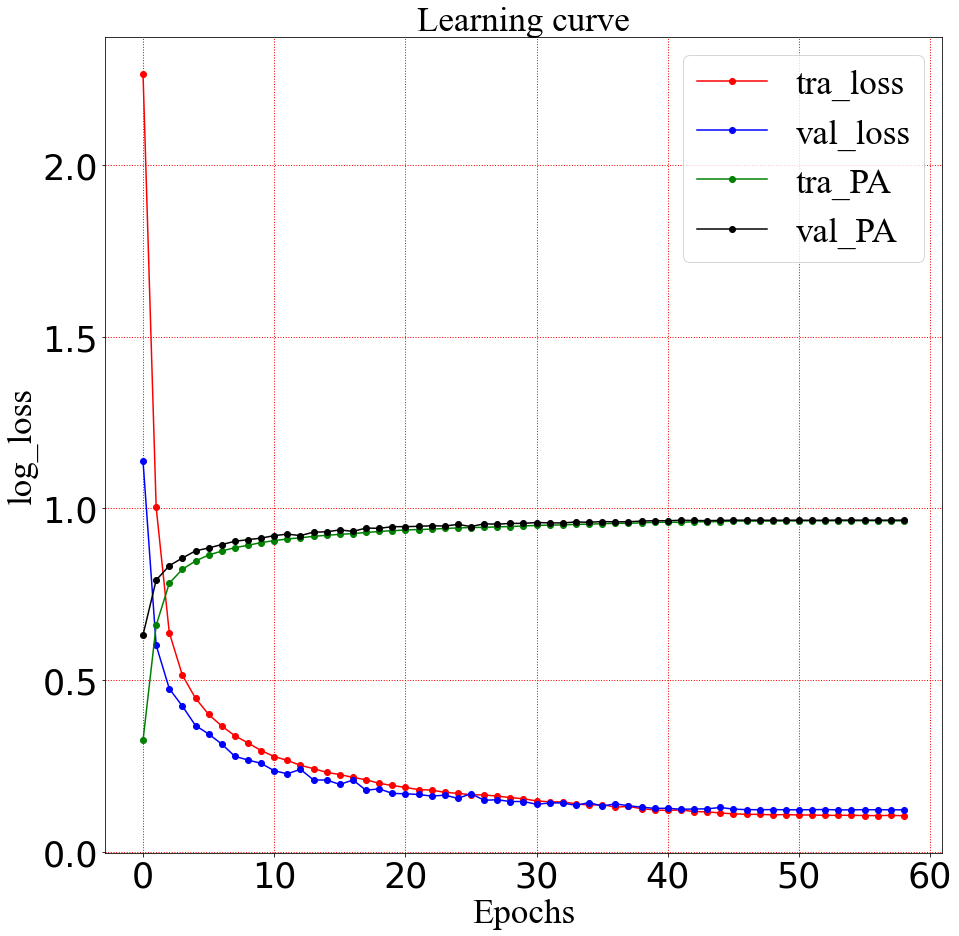

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
size = 35

a,=plt.plot(train.history["loss"], 'go-',label='tra_loss',color = 'r')
b,=plt.plot(train.history["val_loss"], 'go-',label='val_loss',color = 'b')
c,=plt.plot(train.history["categorical_accuracy"], 'go-',label='tra_PA',color = 'g')
d,=plt.plot(train.history["val_categorical_accuracy"], 'go-',label='val_PA',color = 'k')


#设置图例并设置图例的字体及大小
font1 = {'family': 'Times New Roman','weight': 'normal','size': size,}
plt.legend(handles=[a,b,c,d], prop=font1)

#设置坐标轴刻度值以及刻度值的字体
plt.tick_params(labelsize=size)


#设置横纵坐标、标题名称以及对应字体格式
font2 = {'family': 'Times New Roman','weight': 'normal','size': size,}
plt.xlabel('Epochs', font2)
plt.ylabel("log_loss", font2)
plt.title("Learning curve",font2)

plt.grid(linestyle = ':',color = 'r',linewidth=1)
plt.savefig('D:\\jupyter-work\\TCN_sismic_interpretation\\TCN_6-24\\TCN_ZK\\TCN_ZK_section\\train_photo\\TCN_tian_100.jpg',dpi=300)
# plt.legend()
plt.show()

#训练结果写入EXCEL
import os
import xlwt
import xlrd
import pandas as pd
import math

book = xlwt.Workbook(encoding='utf-8',style_compression=0)
sheet = book.add_sheet('cruel', cell_overwrite_ok=True)
sheet.write(0, 0, 'Epoch')
sheet.write(0, 1, 'Loss')
sheet.write(0, 2, 'Val_loss')
sheet.write(0, 3, 'Acc')
sheet.write(0, 4, 'Val_acc')

n=0
row=59
while n<row:
    sheet.write(n+1,0,n+1)#vp名称
    sheet.write(n+1,1,train.history['loss'][n])
    sheet.write(n+1,2,train.history['val_loss'][n])
    sheet.write(n+1,3,str(train.history['categorical_accuracy'][n]))
    sheet.write(n+1,4,train.history['val_categorical_accuracy'][n])

    n=n+1
book.save('D:\\jupyter-work\\TCN_sismic_interpretation\\TCN_6-24\\TCN_ZK\\TCN_ZK_section\\train_photo\\TCN_tian_100.xls')

In [4]:
import pandas as pd

from Load_TCN import *

from TCN import *

# os.environ["CUDA_VISIBLE_DEVICES"] = "1"
test_path = 'D:\\jupyter-work\\TCN_sismic_interpretation\\TCN_6-24\\TCN_ZK\\TCN_ZK_section\\results\\random\\image\\tif\\in\\'
# 'G:\\geoeast\\F3-data\\TCN_intepretation\\prevision_data\\test\\data\\crossline\\'
save_path = 'D:\\jupyter-work\\TCN_sismic_interpretation\\TCN_6-24\\TCN_ZK\\TCN_ZK_section\\results\\random\\pre\\gray\\'
args = 6 #训练集数量

test = testGenerator(test_path)

###模型预测###cr
model = TCN()
model.load_weights('TCN_100.h5')

# model_pre = model.predict(test,args,verbose=1)
model_pre = model.predict_generator(test,args,verbose=1)
print(model_pre.shape)
results = saveResult_in_gray(save_path,model_pre,args,test_path)

print('Results successfully saved.')

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 462, 1)]     0                                            
__________________________________________________________________________________________________
weight_normalization_36 (Weight (None, 462, 64)      1345        input_4[0][0]                    
__________________________________________________________________________________________________
activation_54 (Activation)      (None, 462, 64)      0           weight_normalization_36[0][0]    
__________________________________________________________________________________________________
dropout_36 (Dropout)            (None, 462, 64)      0           activation_54[0][0]              
____________________________________________________________________________________________

(951, 462, 1)
6/6 [==============================] - 2s 414ms/step
(5706, 462, 10)
Results successfully saved.


# 训练集预测

In [3]:
import pandas as pd

from Load_TCN import *

from TCN import *

# os.environ["CUDA_VISIBLE_DEVICES"] = "1"
test_path_cr = 'G:\\geoeast\\F3-data\\TCN_intepretation\\prevision_data\\train_100\\crossline\\'
test_path_in = 'G:\\geoeast\\F3-data\\TCN_intepretation\\prevision_data\\train_100\\inline\\'
# 'G:\\geoeast\\F3-data\\TCN_intepretation\\prevision_data\\test\\data\\crossline\\'
save_path_rgb = 'D:\\jupyter-work\\TCN_sismic_interpretation\\TCN_6-24\\TCN_ZK\\TCN_ZK_section\\results\\train_rgb\\'
save_path_gray = 'D:\\jupyter-work\\TCN_sismic_interpretation\\TCN_6-24\\TCN_ZK\\TCN_ZK_section\\results\\train_gray\\'
# 'D:\\jupyter-work\\TCN_sismic_interpretation\\TCN_6-24\\TCN_ZK\\TCN_ZK_section_50\\results\\random\\pre\\gray\\'
args_cr = 10 
args_in = 7#训练集数量

test_cr = testGenerator(test_path_cr)
test_in = testGenerator(test_path_in)

###模型预测###cr
model = TCN()
model.load_weights('TCN_100.h5')

# model_pre = model.predict(test,args,verbose=1)
model_pre_cr = model.predict_generator(test_cr,args_cr,verbose=1)
model_pre_in = model.predict_generator(test_in,args_in,verbose=1)

results = saveResult_cr_rgb(save_path_rgb,model_pre_cr,args_cr,test_path_cr)
results = saveResult_in_rgb(save_path_rgb,model_pre_in,args_in,test_path_in)
results = saveResult_cr_gray(save_path_gray,model_pre_cr,args_cr,test_path_cr)
results = saveResult_in_gray(save_path_gray,model_pre_in,args_in,test_path_in)

print('Results successfully saved.')

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 462, 1)]     0                                            
__________________________________________________________________________________________________
weight_normalization_24 (Weight (None, 462, 64)      1345        input_3[0][0]                    
__________________________________________________________________________________________________
activation_36 (Activation)      (None, 462, 64)      0           weight_normalization_24[0][0]    
__________________________________________________________________________________________________
dropout_24 (Dropout)            (None, 462, 64)      0           activation_36[0][0]              
____________________________________________________________________________________________

(651, 462, 1)
(651, 462, 1)
10/10 [==============================] - 3s 311ms/step
(951, 462, 1)
(951, 462, 1)
7/7 [==============================] - 3s 423ms/step
Results successfully saved.


# 生成切片数据

In [15]:
import numpy as np
import os
from skimage import io
import cv2
import matplotlib.pyplot as plt

In [16]:
def seismic3d(filepath):
    filepath=filepath
    files=os.listdir(filepath)
#     files.sort(key=lambda x:int(x.split('.')[0]))
    count=0
    im3d=np.zeros(shape=(len(files),io.imread(os.path.join(filepath,files[0])).shape[0],
                  io.imread(os.path.join(filepath,files[0])).shape[1]))
    for file_ in files:
        im2d=cv2.imread(os.path.join(filepath,file_),cv2.IMREAD_GRAYSCALE)
        print(file_)
#         im2d = io.imread(os.path.join(filepath,file_),-1)

        im3d[count]=im2d
        count+=1
    vmin = im3d.min()
    vmax = im3d.max()
    print(vmin,vmax)
#     print(im3d.shape)
    return im3d,vmin,vmax
def plot(img, cmap='gray',vmin=None, vmax=None):
    """Makes seaborn style plots"""
    dt = 1
    dx = 1
    Y,X = np.mgrid[slice(0, 601 + dt, dt), slice(0, 951 + dx, dx)]  ##Y = 1880 , X = 2719

    fig = plt.figure()

    if (vmin is None or vmax is None):

        plt.pcolormesh(X, Y, img, cmap=cmap)

    else:

        plt.pcolormesh(X, Y, img, cmap=cmap, vmin=vmin, vmax=vmax)
        
    plt.axis('off')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    return fig

In [17]:
filepath = 'D:\\jupyter-work\\TCN_sismic_interpretation\\TCN_6-24\\TCN_ZK\\TCN_ZK_section\\results\\100-all\\gray\\'
save_path = 'D:\\jupyter-work\\TCN_sismic_interpretation\\TCN_6-24\\TCN_ZK\\TCN_ZK_section\\results\\100-all\\gray_slice\\'

im3d,vmin,vmax = seismic3d(filepath)

inline_100.tiff
inline_101.tiff
inline_102.tiff
inline_103.tiff
inline_104.tiff
inline_105.tiff
inline_106.tiff
inline_107.tiff
inline_108.tiff
inline_109.tiff
inline_110.tiff
inline_111.tiff
inline_112.tiff
inline_113.tiff
inline_114.tiff
inline_115.tiff
inline_116.tiff
inline_117.tiff
inline_118.tiff
inline_119.tiff
inline_120.tiff
inline_121.tiff
inline_122.tiff
inline_123.tiff
inline_124.tiff
inline_125.tiff
inline_126.tiff
inline_127.tiff
inline_128.tiff
inline_129.tiff
inline_130.tiff
inline_131.tiff
inline_132.tiff
inline_133.tiff
inline_134.tiff
inline_135.tiff
inline_136.tiff
inline_137.tiff
inline_138.tiff
inline_139.tiff
inline_140.tiff
inline_141.tiff
inline_142.tiff
inline_143.tiff
inline_144.tiff
inline_145.tiff
inline_146.tiff
inline_147.tiff
inline_148.tiff
inline_149.tiff
inline_150.tiff
inline_151.tiff
inline_152.tiff
inline_153.tiff
inline_154.tiff
inline_155.tiff
inline_156.tiff
inline_157.tiff
inline_158.tiff
inline_159.tiff
inline_160.tiff
inline_161.tiff
inline_1

inline_613.tiff
inline_614.tiff
inline_615.tiff
inline_616.tiff
inline_617.tiff
inline_618.tiff
inline_619.tiff
inline_620.tiff
inline_621.tiff
inline_622.tiff
inline_623.tiff
inline_624.tiff
inline_625.tiff
inline_626.tiff
inline_627.tiff
inline_628.tiff
inline_629.tiff
inline_630.tiff
inline_631.tiff
inline_632.tiff
inline_633.tiff
inline_634.tiff
inline_635.tiff
inline_636.tiff
inline_637.tiff
inline_638.tiff
inline_639.tiff
inline_640.tiff
inline_641.tiff
inline_642.tiff
inline_643.tiff
inline_644.tiff
inline_645.tiff
inline_646.tiff
inline_647.tiff
inline_648.tiff
inline_649.tiff
inline_650.tiff
inline_651.tiff
inline_652.tiff
inline_653.tiff
inline_654.tiff
inline_655.tiff
inline_656.tiff
inline_657.tiff
inline_658.tiff
inline_659.tiff
inline_660.tiff
inline_661.tiff
inline_662.tiff
inline_663.tiff
inline_664.tiff
inline_665.tiff
inline_666.tiff
inline_667.tiff
inline_668.tiff
inline_669.tiff
inline_670.tiff
inline_671.tiff
inline_672.tiff
inline_673.tiff
inline_674.tiff
inline_6

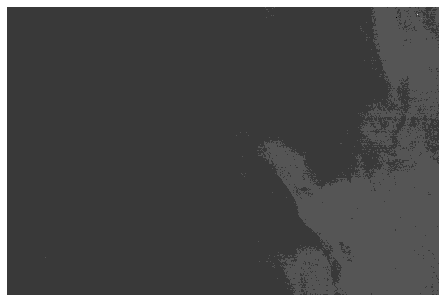

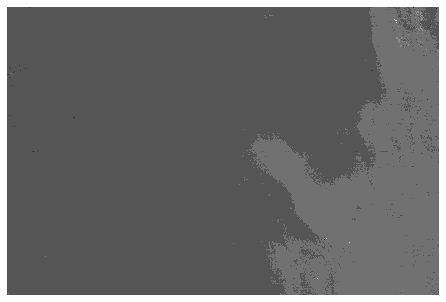

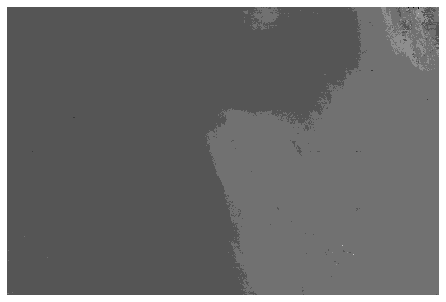

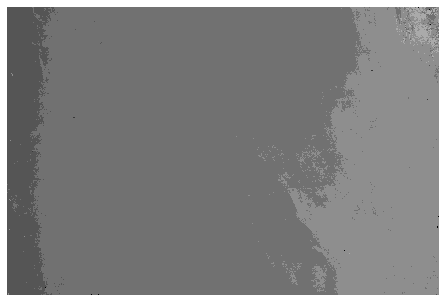

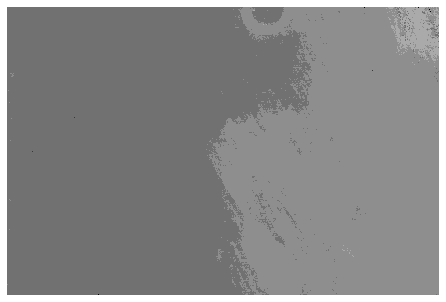

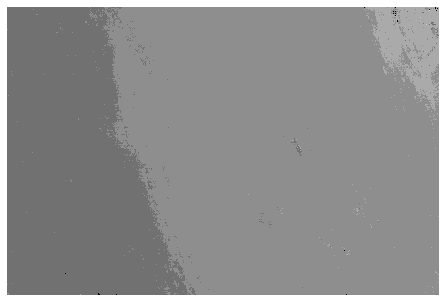

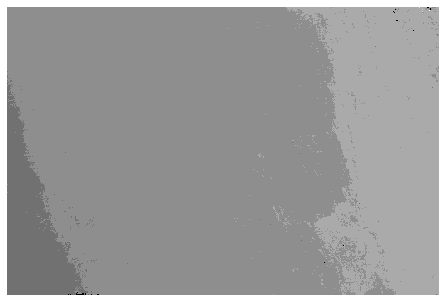

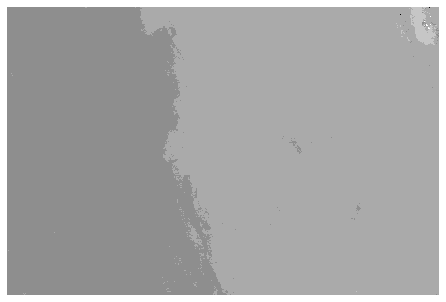

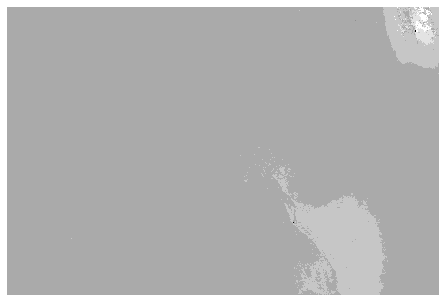

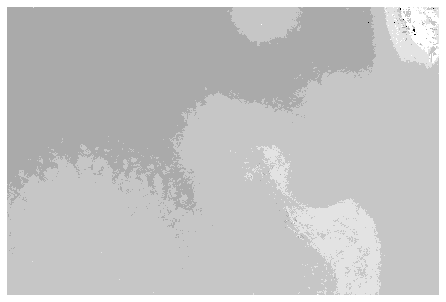

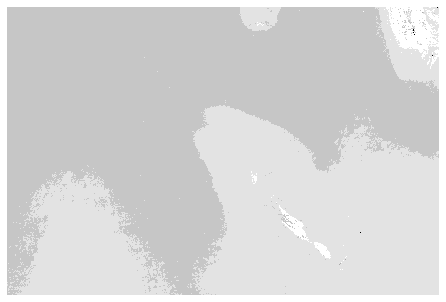

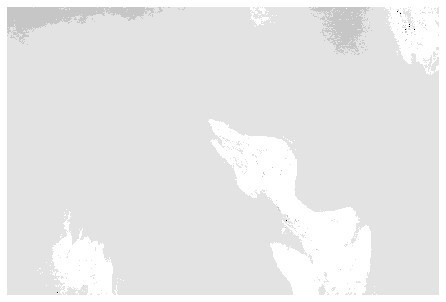

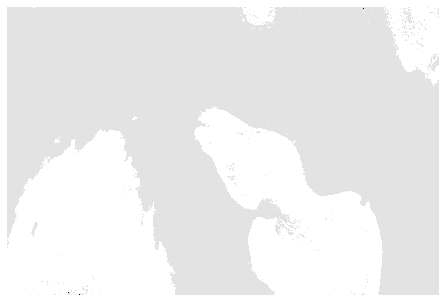

In [18]:
time_data = [100,125,130,150,160,190,220,250,280,310,340,375,400]
names = ['400ms','500ms','520ms','600ms','640ms','760ms','880ms','1000ms','1120ms','1240ms','1360ms','1500ms','1600ms']

count = 0
for i in time_data:
    a = im3d[:,i,:]  #3维数据切片
#     print(a.shape)
    a = np.reshape(a,(601,951))  #reshape
    fig = plot(a, vmin=vmin, vmax=vmax)  #绘图
    name=names[count] # 时间位置切片
    fig.savefig(os.path.join(save_path,name),transparent=True,dpi=300, pad_inches = 0)
    count = count+1